# Geneartion of a Quantum Circuit to guess a Number 

For a 'N' bit number, a classical computer takes 'n' tries to find the number.
But a Quantum Computer can do it in a single try; let's see how.

Step 1: Import neccessary libraries

In [ ]:
!pip install qiskit==0.16.1

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

Lets try to generate a circuit for a particular binary secret number - 101001

In [26]:
number = '101001'

Step 2: Building the circuit layer by layer

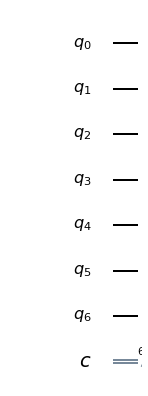

In [27]:
circuit = QuantumCircuit(6+1, 6)
circuit.draw(output='mpl')

Step 2.1: Add hadamard gates for each of the bits to put them into a superposition state

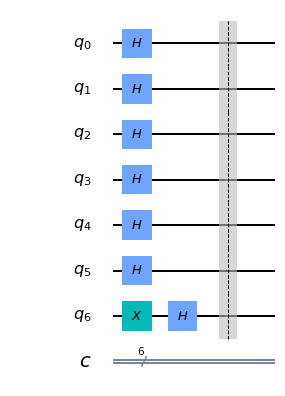

In [28]:
circuit.h([0,1,2,3,4,5])

circuit.x(6)
circuit.h(6)

circuit.barrier()

circuit.draw(output='mpl')

Step 2.2: Add cx gates between the last bit and all the other bits having a state of '1'

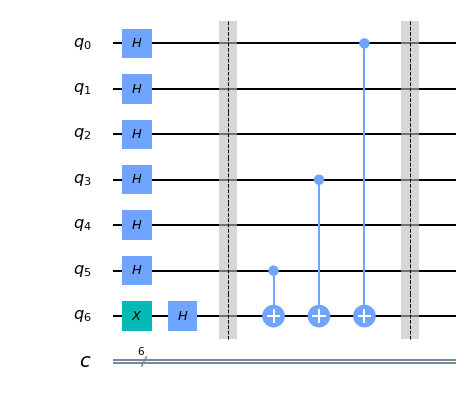

In [29]:
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.draw(output='mpl')

Step 2.3: Finally add a hadamard gate at the end followed by measurement

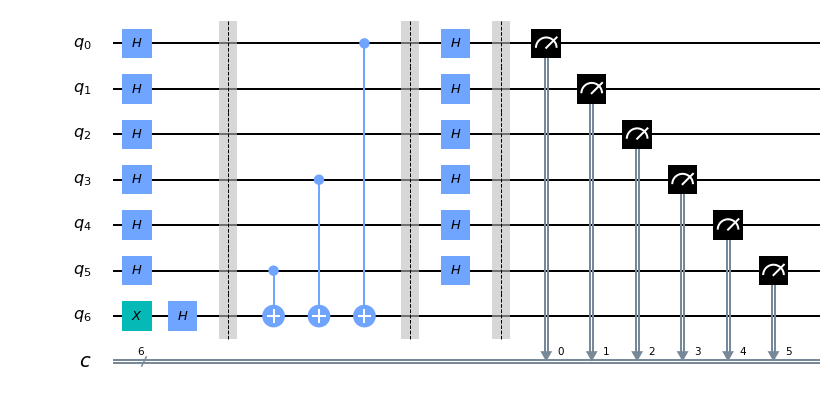

In [30]:
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.draw(output='mpl')

Now lets try to simulate and try to check if the quantum circuit found our secret number

In [31]:
simulator = Aer.get_backend('qasm_simulator')
ANS = execute(circuit, backend=simulator, shots=1).result()
counts = ANS.get_counts()

In [32]:
counts

{'101001': 1}

# Generalisation: 

Lets try to generalize our previous circuit for any arbitrary number 

In [63]:
secretNumber = '100110'

#input(secretNumber)

Create a circuit for a arbitary length

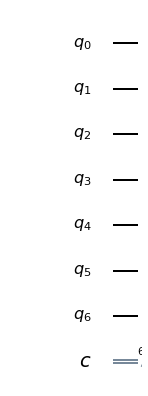

In [64]:
genCirc = QuantumCircuit(len(secretNumber)+1, 6)
genCirc.draw(output='mpl')

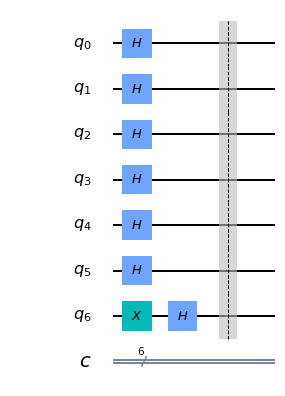

In [65]:
genCirc.h(range(len(secretNumber)))
genCirc.x(len(secretNumber))
genCirc.h(len(secretNumber))

genCirc.barrier()
genCirc.draw(output='mpl')

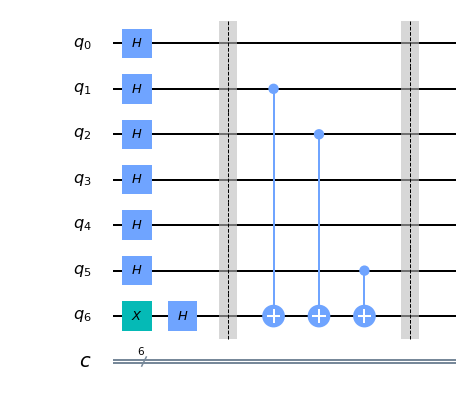

In [66]:
RsecretNumber = reversed(secretNumber)
LsecretNumber = len(secretNumber) 

for i, bit in enumerate(RsecretNumber):
    
    if bit=='1':
        genCirc.cx(i, LsecretNumber)

genCirc.barrier()
genCirc.draw(output='mpl')


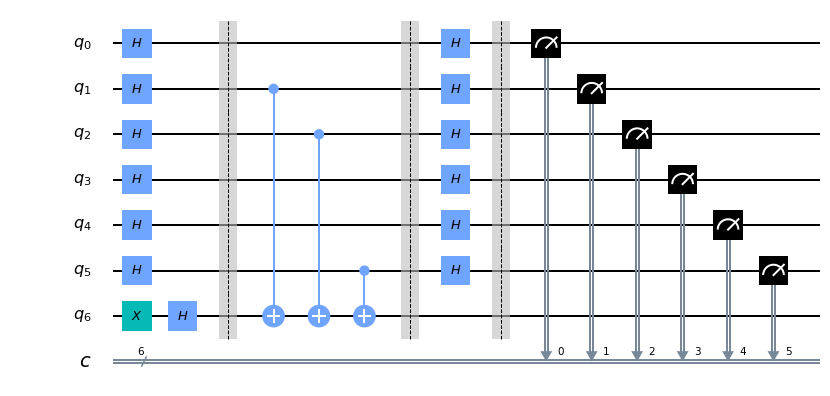

In [67]:
genCirc.h(range(len(secretNumber)))
genCirc.barrier()
genCirc.measure(range(len(secretNumber)), range(len(secretNumber)))
genCirc.draw(output='mpl')

In [68]:
simulator = Aer.get_backend('qasm_simulator')
ANS = execute(genCirc, backend=simulator, shots=1).result()
counts = ANS.get_counts()

In [69]:
counts

{'100110': 1}